# Convolutional Neural Network
* https://www.youtube.com/watch?v=pDdP0TFzsoQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=14

In [20]:
from PIL import Image

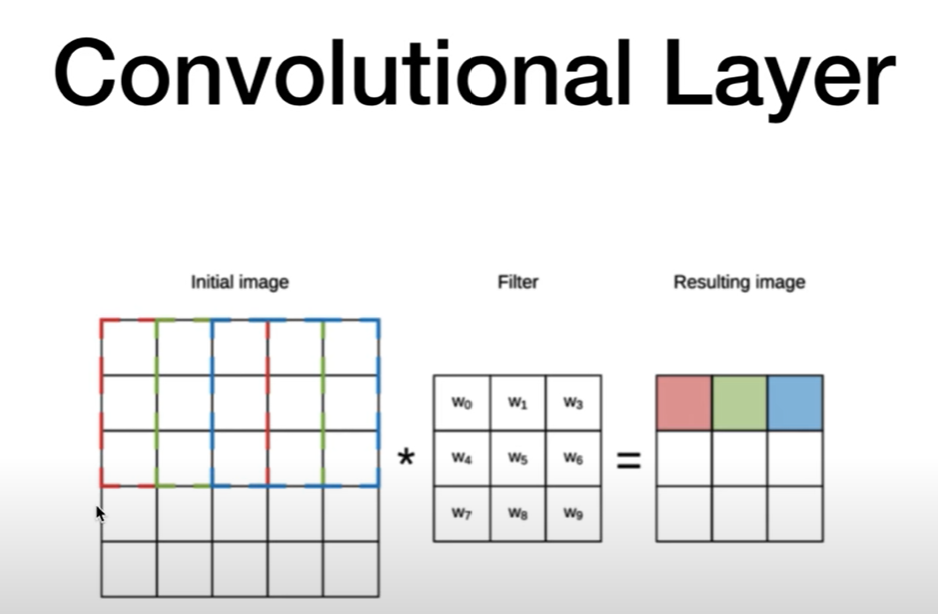

In [23]:
im = Image.open('/content/drive/MyDrive/study_DeepLearning/data/convolution_layer.png')
im

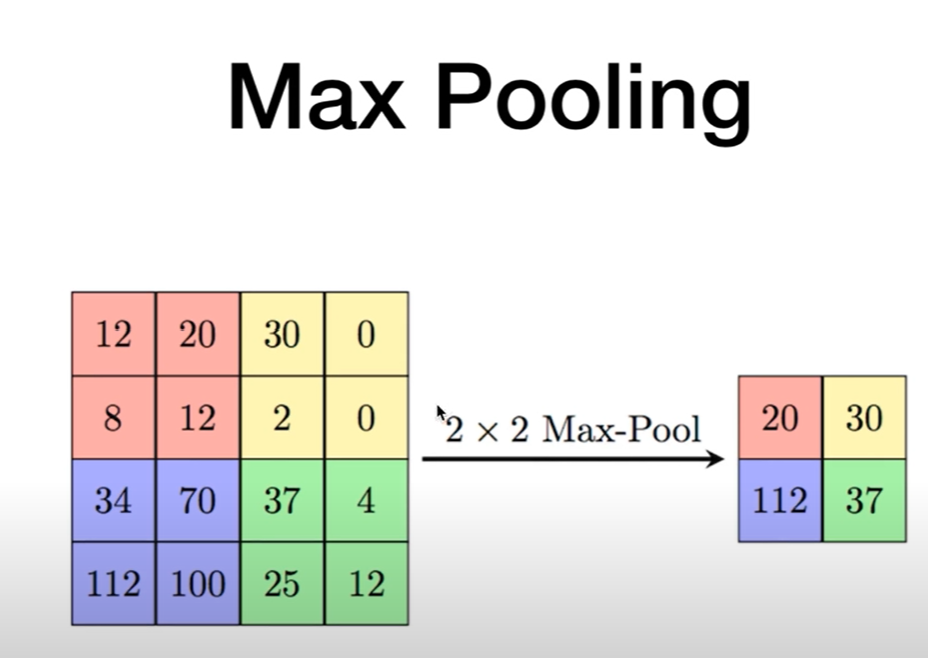

In [22]:
im = Image.open('/content/drive/MyDrive/study_DeepLearning/data/max_pooling.png')
im

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [7]:
# Hyper-parameter
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [9]:
# dataset has PILImage images of range [0, 1].
# We transform them to Tensor of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
train_dataset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/study_DeepLearning/data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/study_DeepLearning/data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 170498071/170498071 [00:03<00:00, 45205309.73it/s]


Extracting /content/drive/MyDrive/study_DeepLearning/data/cifar-10-python.tar.gz to /content/drive/MyDrive/study_DeepLearning/data
Files already downloaded and verified


In [17]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truch')

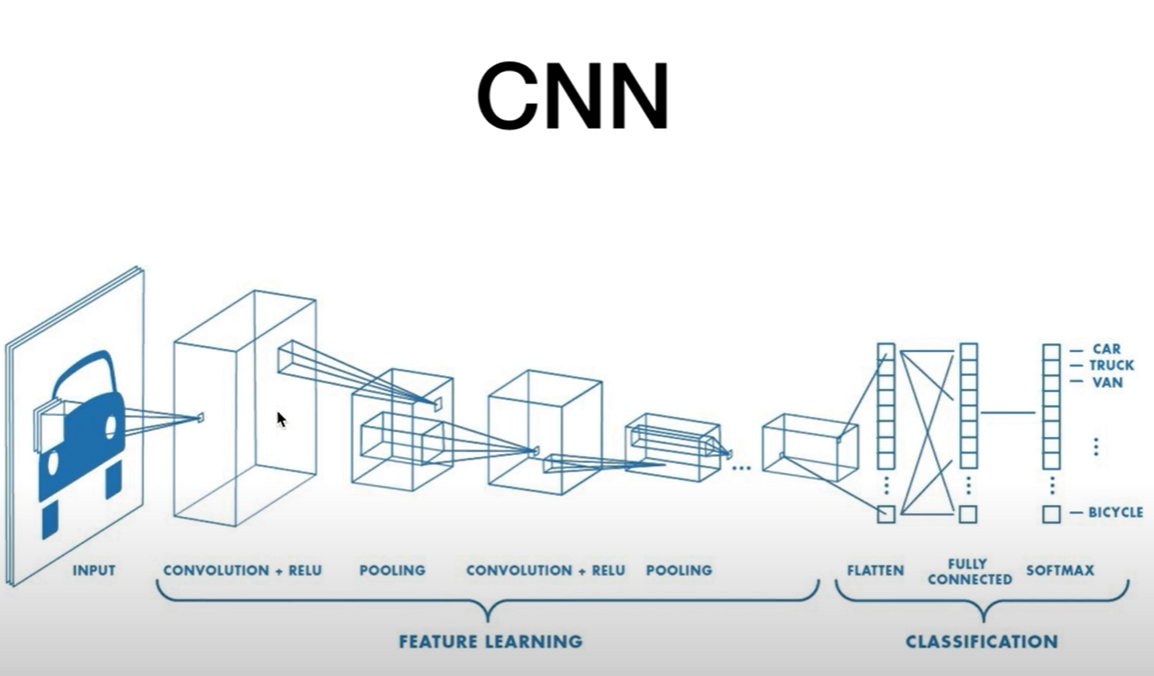

In [24]:
im = Image.open('/content/drive/MyDrive/study_DeepLearning/data/cnn.png')
im

In [13]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,6, 5) # coloar input channels=3 <- coler, output channels 6 * 5
    self.pool = nn.MaxPool2d(2, 2) # max pool = 2 * 2
    self.conv2 = nn.Conv2d(6, 16, 5) # なぜ(6, 16, 5)かは、youtudeの12:17から
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

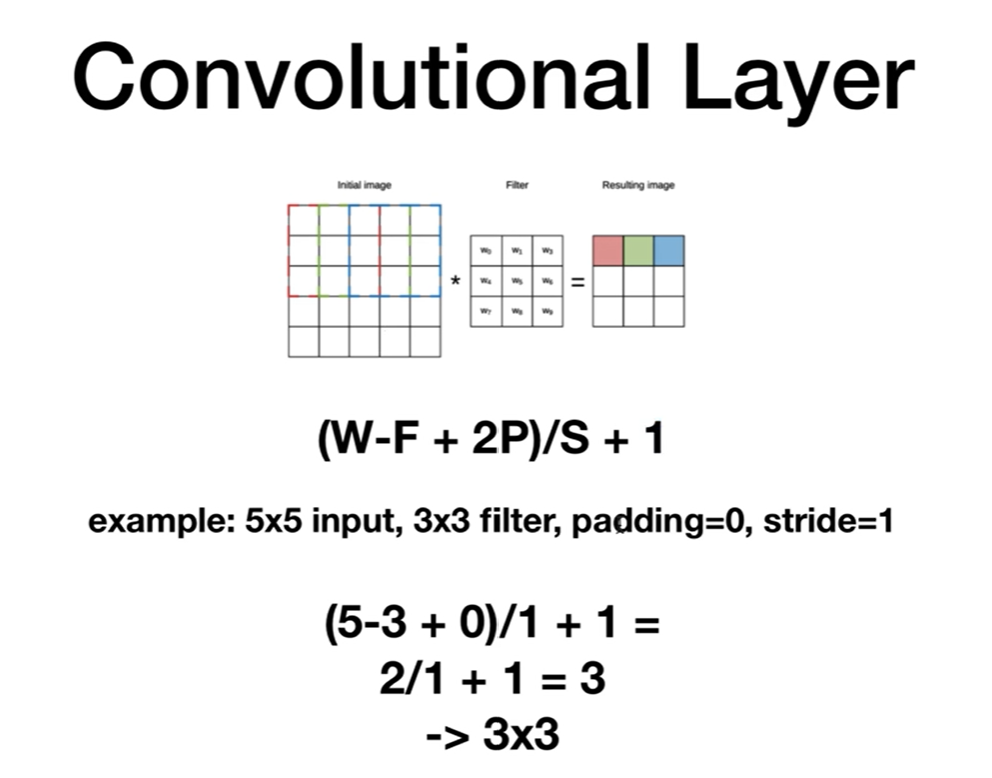

In [25]:
im = Image.open('/content/drive/MyDrive/study_DeepLearning/data/conv_calc.png')
im

In [14]:
model = ConvNet().to(device)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # original shape: [4, 3, 32, 32] = 4, 3, 1024
    # input layer: 3 input channels, 6 output channels, 5 kernel size
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 200 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('finished training')

Epoch [1/4], Step [200/12500], Loss: 2.2967
Epoch [1/4], Step [400/12500], Loss: 2.3114
Epoch [1/4], Step [600/12500], Loss: 2.3099
Epoch [1/4], Step [800/12500], Loss: 2.3072
Epoch [1/4], Step [1000/12500], Loss: 2.3314
Epoch [1/4], Step [1200/12500], Loss: 2.2560
Epoch [1/4], Step [1400/12500], Loss: 2.2783
Epoch [1/4], Step [1600/12500], Loss: 2.3235
Epoch [1/4], Step [1800/12500], Loss: 2.2728
Epoch [1/4], Step [2000/12500], Loss: 2.2810
Epoch [1/4], Step [2200/12500], Loss: 2.2897
Epoch [1/4], Step [2400/12500], Loss: 2.3123
Epoch [1/4], Step [2600/12500], Loss: 2.2966
Epoch [1/4], Step [2800/12500], Loss: 2.3284
Epoch [1/4], Step [3000/12500], Loss: 2.2344
Epoch [1/4], Step [3200/12500], Loss: 2.2816
Epoch [1/4], Step [3400/12500], Loss: 2.2922
Epoch [1/4], Step [3600/12500], Loss: 2.3206
Epoch [1/4], Step [3800/12500], Loss: 2.2968
Epoch [1/4], Step [4000/12500], Loss: 2.3166
Epoch [1/4], Step [4200/12500], Loss: 2.3072
Epoch [1/4], Step [4400/12500], Loss: 2.2938
Epoch [1/4], S

In [18]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    # max returns (value, index)
    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = predicted[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the network: {acc} %')

for i in range(10):
  acc = 100.0 * n_class_correct[i] / n_class_samples[i]
  print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 45.99 %
Accuracy of plane: 60.7 %
Accuracy of car: 70.3 %
Accuracy of bird: 23.1 %
Accuracy of cat: 33.5 %
Accuracy of deer: 32.0 %
Accuracy of dog: 39.7 %
Accuracy of frog: 64.8 %
Accuracy of horse: 44.5 %
Accuracy of ship: 55.1 %
Accuracy of truch: 36.2 %
